## Load admissions table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import string
from nltk import word_tokenize


def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

vect = pickle.load(open("vector.pickel", "rb"))

In [2]:
path = 'cleaned_data/'
df_train = pd.read_csv(path + 'df_train.csv', header=0, sep=',', quotechar='"')
df_valid = pd.read_csv(path + 'df_valid.csv', header=0, sep=',', quotechar='"')
df_test = pd.read_csv(path + 'df_test.csv', header=0, sep=',', quotechar='"')

In [3]:
X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)

In [4]:
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

In [5]:
X_test_tf = vect.transform(df_test.TEXT.values)
y_test = df_test.OUTPUT_LABEL

# Step 3: Build a simple predictive model

## Xgboost

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [7]:
clf = XGBClassifier(
silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
#nthread=4,# cpu 线程数 默认最大
learning_rate= 0.3, # 如同学习率
min_child_weight=1,
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
max_depth=8, # 构建树的深度，越大越容易过拟合
gamma=0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
subsample=0.8, # 随机采样训练样本 训练实例的子采样比
max_delta_step=0,#最大增量步长，我们允许每个树的权重估计。
colsample_bytree=1, # 生成树时进行的列采样
reg_lambda=1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#reg_alpha=0, # L1 正则项参数
#scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
#objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
#num_class=10, # 类别数，多分类与 multisoftmax 并用
n_estimators=1000, #树的个数
seed=1000 #随机种子
#eval_metric= 'auc'
)

# clf.fit(X_train_tf,y_train,eval_metric='auc')

In [8]:
#设置验证集合 verbose=False不打印过程
clf.fit(X_train_tf, y_train,eval_set=[(X_train_tf, y_train), (X_valid_tf, y_valid)],
        eval_metric='auc',early_stopping_rounds=100 ,verbose=True)

[11:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=8
[0]	validation_0-auc:0.775685	validation_1-auc:0.615893
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[11:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=8
[1]	validation_0-auc:0.847751	validation_1-auc:0.641189
[11:49:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=8
[2]	validation_0-auc:0.885564	validation_1-auc:0.656637
[11:49:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 2 pruned nodes, max_depth=8
[3]	validation_0-auc:0.91129	validation_1-auc:0.660848
[11:49:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 2 pruned nodes, max_depth=8
[4]	validation_0-auc:0.933153	validation_1-auc:0.659448

[11:50:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 pruned nodes, max_depth=8
[48]	validation_0-auc:0.999134	validation_1-auc:0.686138
[11:50:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 4 pruned nodes, max_depth=8
[49]	validation_0-auc:0.999144	validation_1-auc:0.686573
[11:50:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 4 pruned nodes, max_depth=8
[50]	validation_0-auc:0.999194	validation_1-auc:0.687732
[11:50:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 4 pruned nodes, max_depth=8
[51]	validation_0-auc:0.999292	validation_1-auc:0.688621
[11:50:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=8
[52]	validation_0-auc:0.999342	validation_1-auc:0.689494
[11:50:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 8 pruned nodes, max_depth=8
[53]	validation_0-auc:0.99937	validation_

[11:50:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=8
[97]	validation_0-auc:0.999592	validation_1-auc:0.69315
[11:50:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 6 pruned nodes, max_depth=8
[98]	validation_0-auc:0.999573	validation_1-auc:0.693169
[11:50:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=8
[99]	validation_0-auc:0.999582	validation_1-auc:0.693016
[11:50:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 8 pruned nodes, max_depth=8
[100]	validation_0-auc:0.999592	validation_1-auc:0.693148
[11:50:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=8
[101]	validation_0-auc:0.999592	validation_1-auc:0.692772
[11:50:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes, max_depth=8
[102]	validation_0-auc:0.999582	validatio

[11:50:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 14 pruned nodes, max_depth=8
[146]	validation_0-auc:0.999602	validation_1-auc:0.69702
[11:50:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 14 pruned nodes, max_depth=8
[147]	validation_0-auc:0.999602	validation_1-auc:0.696922
[11:50:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 14 pruned nodes, max_depth=8
[148]	validation_0-auc:0.999602	validation_1-auc:0.697182
[11:50:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 18 pruned nodes, max_depth=8
[149]	validation_0-auc:0.999602	validation_1-auc:0.696999
[11:50:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 28 pruned nodes, max_depth=8
[150]	validation_0-auc:0.999602	validation_1-auc:0.696543
[11:50:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 14 pruned nodes, max_depth=8
[151]	validation_0-auc:0.999602	v

[11:51:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 24 pruned nodes, max_depth=7
[194]	validation_0-auc:0.999602	validation_1-auc:0.697504
[11:51:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 22 pruned nodes, max_depth=8
[195]	validation_0-auc:0.999602	validation_1-auc:0.697943
[11:51:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 26 pruned nodes, max_depth=6
[196]	validation_0-auc:0.999602	validation_1-auc:0.697548
[11:51:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=7
[197]	validation_0-auc:0.999602	validation_1-auc:0.6972
[11:51:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=8
[198]	validation_0-auc:0.999602	validation_1-auc:0.696693
[11:51:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 22 pruned nodes, max_depth=5
[199]	validation_0-auc:0.999602	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.3, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1000, silent=0,
       subsample=0.8)

In [9]:
model = clf
y_train_preds = model.predict(X_train_tf)
y_valid_preds = model.predict(X_valid_tf)

In [10]:
#获取验证集合结果
evals_result = clf.evals_result()
y_true, y_pred = np.array(y_test), clf.predict(X_test_tf)
print("Accuracy : " + str(metrics.accuracy_score(y_true, y_pred)))

Accuracy : 0.6377983565931916


In [11]:
feature_nums = 20
np.sort(clf.feature_importances_)[-feature_nums:]

array([0.0041335 , 0.0041335 , 0.0041335 , 0.0041335 , 0.00428659,
       0.00428659, 0.00474587, 0.00474587, 0.00474587, 0.00489896,
       0.00489896, 0.00520514, 0.00520514, 0.00535824, 0.00551133,
       0.00566442, 0.00704225, 0.00719535, 0.00872627, 0.00903246],
      dtype=float32)

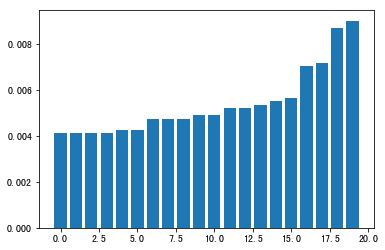

In [12]:
# plot
plt.bar(range(feature_nums), np.sort(clf.feature_importances_)[-feature_nums:])
plt.show()

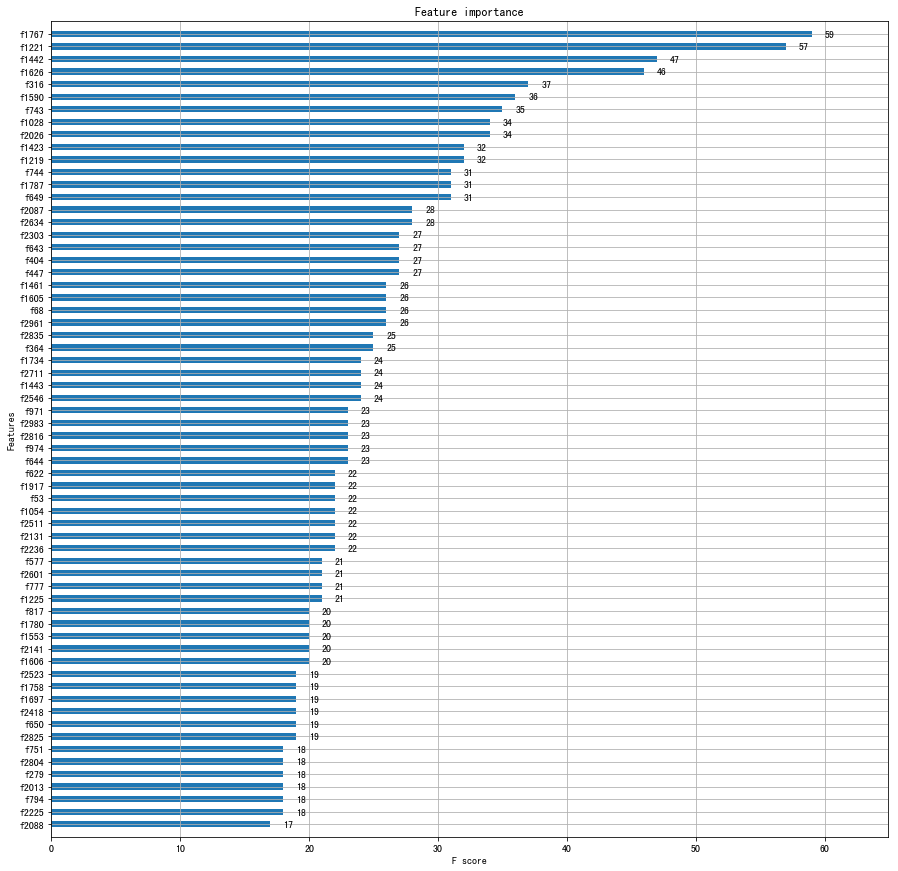

In [13]:
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(clf,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()

# Step 4. Calculate Performance Metrics

<img src="perf_metrics.png">

In [14]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)


Train AUC:0.990
Valid AUC:0.649
Train accuracy:0.990
Valid accuracy:0.633
Train recall:0.979
Valid recall:0.668
Train precision:1.000
Valid precision:0.099
Train specificity:1.000
Valid specificity:0.631
Train prevalence:0.500
Valid prevalence:0.057


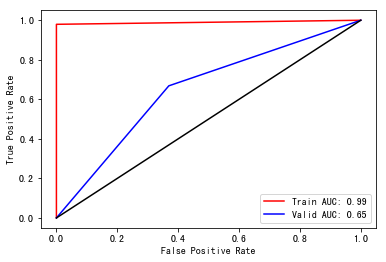

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Valid dataset: 


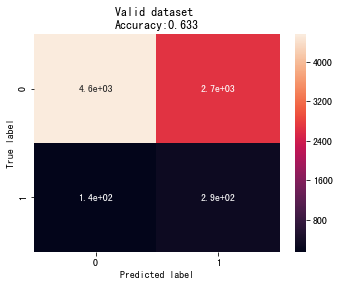

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Valid dataset: ")
cm = confusion_matrix(y_valid, y_valid_preds)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Valid dataset \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_valid, y_valid_preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Trainning dataset: 


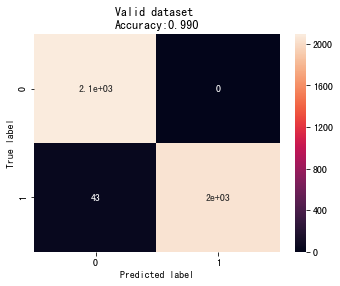

In [17]:
print("Trainning dataset: ")
cm = confusion_matrix(y_train, y_train_preds)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Valid dataset \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_train, y_train_preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 5. Try to improve the model

At this point, you might be tempted to calculate the performance on your test set and see how you did. But wait! We made many choices  (a few below) which we could change and see if there is an effect:
- which and how much data to use - should we spend time getting more data?
- how to tokenize - should we use something called stemming too? 
- how to vectorizer - should we change the number of words?
- how to regularized the logistic regression - should we change C or penalty?
- which model to use?

When we want to improve the model, we want to do it in a data-driven manner (if we can). 

You can spend a lot of time on 'hunches', that don't end up panning out. 

There are a few techniques that will help us get big insight.  

I read a lot of articles about data science and luckily most people post their code.

### Tip A: Use other people's code for nice visualizations. Source: https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

Visualize the top words for positive and negative classes to see if there are any patterns which could give insight into additional features to add or remove

In [27]:
index_to_word = {v:k for k,v in vect.vocabulary_.items()}
classes ={}

for class_index in range(clf.feature_importances_.shape[0]):
    classes[index_to_word[class_index]] = clf.feature_importances_[class_index]

{'aaa': 0.0,
 'aaox': 0.0,
 'ab': 0.00015309246,
 'abd': 0.00076546235,
 'abdomen': 0.0013778323,
 'abdominal': 0.0018371096,
 'abg': 0.0,
 'ability': 0.0,
 'ablation': 0.0,
 'able': 0.00030618493,
 'abnormal': 0.00015309246,
 'abnormalities': 0.00015309246,
 'abnormality': 0.00030618493,
 'about': 0.00030618493,
 'above': 0.0012247397,
 'abscess': 0.0,
 'absence': 0.0,
 'absent': 0.0,
 'abuse': 0.00061236985,
 'abx': 0.0,
 'ac': 0.00015309246,
 'access': 0.00015309246,
 'accessory': 0.0,
 'accident': 0.0,
 'according': 0.0,
 'ace': 0.00015309246,
 'acetaminophen': 0.0004592774,
 'acetate': 0.0,
 'acid': 0.00015309246,
 'acidosis': 0.0,
 'acquired': 0.0,
 'across': 0.0,
 'active': 0.0,
 'activities': 0.00061236985,
 'activity': 0.00030618493,
 'actuation': 0.0,
 'acute': 0.001990202,
 'acyclovir': 0.0,
 'added': 0.00030618493,
 'addendum': 0.001990202,
 'addition': 0.00015309246,
 'additional': 0.00061236985,
 'additionally': 0.0,
 'address': 0.0,
 'adenocarcinoma': 0.0,
 'adequate': 0

In [29]:
# let's see how many words are not helpful at all
uselsee_words = [k for k,v in classes.items() if v == 0]
len(uselsee_words)

1558

In [33]:
sorted_words = sorted(classes.items(), key = lambda x : x[1], reverse=True)
sorted_words[:20]

[('no', 0.009032455),
 ('hospital', 0.008726271),
 ('last', 0.007195346),
 ('mg', 0.0070422534),
 ('blood', 0.0056644212),
 ('md', 0.005511329),
 ('discharge', 0.0053582364),
 ('first', 0.0052051437),
 ('po', 0.0052051437),
 ('home', 0.004898959),
 ('known', 0.004898959),
 ('day', 0.0047458666),
 ('discharged', 0.0047458666),
 ('not', 0.0047458666),
 ('prior', 0.004286589),
 ('tablet', 0.004286589),
 ('care', 0.0041334964),
 ('chest', 0.0041334964),
 ('d', 0.0041334964),
 ('right', 0.0041334964)]

In [36]:
sorted_words[:100]

[('no', 0.009032455),
 ('hospital', 0.008726271),
 ('last', 0.007195346),
 ('mg', 0.0070422534),
 ('blood', 0.0056644212),
 ('md', 0.005511329),
 ('discharge', 0.0053582364),
 ('first', 0.0052051437),
 ('po', 0.0052051437),
 ('home', 0.004898959),
 ('known', 0.004898959),
 ('day', 0.0047458666),
 ('discharged', 0.0047458666),
 ('not', 0.0047458666),
 ('prior', 0.004286589),
 ('tablet', 0.004286589),
 ('care', 0.0041334964),
 ('chest', 0.0041334964),
 ('d', 0.0041334964),
 ('right', 0.0041334964),
 ('after', 0.003980404),
 ('left', 0.003980404),
 ('medications', 0.003980404),
 ('will', 0.003980404),
 ('c', 0.0038273118),
 ('up', 0.0038273118),
 ('lastname', 0.0036742191),
 ('needed', 0.0036742191),
 ('stitle', 0.0036742191),
 ('time', 0.0036742191),
 ('daily', 0.0035211267),
 ('f', 0.0035211267),
 ('facility', 0.0035211267),
 ('un', 0.0035211267),
 ('x', 0.0035211267),
 ('admission', 0.0033680343),
 ('ct', 0.0033680343),
 ('follow', 0.0033680343),
 ('pain', 0.0033680343),
 ('pulmonary',

In [39]:
my_new_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','should','if','it','been','who','during', 'd', 'c', 'f']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(lowercase = True, max_features = 2000, tokenizer = tokenizer_better,stop_words =my_new_stop_words)
#
# This could take a while
vect.fit(df_train.TEXT.values)

X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

### Tip B: pick a single metric for evaluation

all decisions will have a trade-off on the metrics described above. Let's choose AUC for this project as it balances FPR and TPR. 

### Tip C: plot a learning curve

Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [41]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [42]:
clf = XGBClassifier(
silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
#nthread=4,# cpu 线程数 默认最大
learning_rate= 0.3, # 如同学习率
min_child_weight=1,
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
max_depth=8, # 构建树的深度，越大越容易过拟合
gamma=0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
subsample=0.8, # 随机采样训练样本 训练实例的子采样比
max_delta_step=0,#最大增量步长，我们允许每个树的权重估计。
colsample_bytree=1, # 生成树时进行的列采样
reg_lambda=1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#reg_alpha=0, # L1 正则项参数
#scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
#objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
#num_class=10, # 类别数，多分类与 multisoftmax 并用
n_estimators=1000, #树的个数
seed=1000 #随机种子
#eval_metric= 'auc'
)

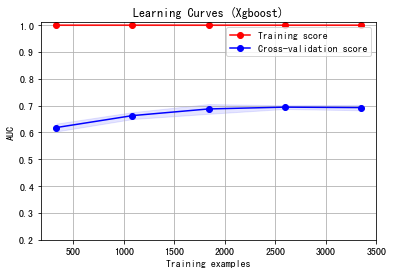

In [43]:
title = "Learning Curves (Xgboost)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = clf
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

### Tip D: get an understanding of how the hyperparameters affect your results

You can run a grid-search if you want to select the best option out of all your parameters, but for this workshop we will just visually look at them. 

In [54]:
# Comment out any parameter you don't want to test
def XGB_CV(
          max_depth,
          gamma,
          min_child_weight,
          max_delta_step,
          subsample,
          colsample_bytree,
          reg_lambda,
         # reg_alpha
         ):

    global AUCbest
    global ITERbest

#
# Define all XGboost parameters
#

    paramt = {
              'booster' : 'gbtree',
              'max_depth' : int(max_depth),
              'gamma' : gamma,
              'eta' : 0.1,
              'objective' : 'binary:logistic',
              'nthread' : 4,
              'silent' : True,
              'eval_metric': 'auc',
              'subsample' : max(min(subsample, 1), 0),
              'colsample_bytree' : max(min(colsample_bytree, 1), 0),
              'min_child_weight' : min_child_weight,
              'max_delta_step' : int(max_delta_step),
              'reg_lambda': max(min(reg_lambda, 1), 0),
              #'reg_alpha': max(min(reg_alpha, 1), 0),
              'seed' : 1001
              }

    folds = 5
    cv_score = 0

    print("\n Search parameters (%d-fold validation):\n %s" % (folds, paramt), file=log_file )
    log_file.flush()

    xgbc = xgb.cv(
                    paramt,
                    dtrain,
                    num_boost_round = 20000,
                    stratified = True,
                    nfold = folds,
#                    verbose_eval = 10,
                    early_stopping_rounds = 100,
                    metrics = 'auc',
                    show_stdv = True
               )

# This line would have been on top of this section
#    with capture() as result:

# After xgb.cv is done, this section puts its output into log file. Train and validation scores 
# are also extracted in this section. Note the "diff" part in the printout below, which is the 
# difference between the two scores. Large diff values may indicate that a particular set of 
# parameters is overfitting, especially if you check the CV portion of it in the log file and find 
# out that train scores were improving much faster than validation scores.

#    print('', file=log_file)
#    for line in result[1]:
#        print(line, file=log_file)
#    log_file.flush()

    val_score = xgbc['test-auc-mean'].iloc[-1]
    train_score = xgbc['train-auc-mean'].iloc[-1]
    print(' Stopped after %d iterations with train-auc = %f val-auc = %f ( diff = %f ) train-gini = %f val-gini = %f' % ( len(xgbc), train_score, val_score, (train_score - val_score), (train_score*2-1),
(val_score*2-1)) )
    if ( val_score > AUCbest ):
        AUCbest = val_score
        ITERbest = len(xgbc)

    return (val_score*2) - 1

In [55]:
# Define the log file. If you repeat this run, new output will be added to it
log_file = open('AUC-5fold-XGB-run-01-v1-full.log', 'a')
AUCbest = -1.
ITERbest = 0

n_train = X_train_tf.shape[0]

print('\n Shape of processed train data:', X_train_tf.shape)
print(' Shape of processed test data:', X_valid_tf.shape)


 Shape of processed train data: (4184, 2000)
 Shape of processed test data: (7667, 2000)


In [56]:
from bayes_opt import BayesianOptimization
dtrain = xgb.DMatrix(X_train_tf, label = y_train)

XGB_BO = BayesianOptimization(XGB_CV, {
                                     'max_depth': (2, 12),
                                     'gamma': (0.001, 10.0),
                                     'min_child_weight': (0, 20),
                                     'max_delta_step': (0, 10),
                                     'subsample': (0.4, 1.0),
                                     'colsample_bytree' :(0.4, 1.0),
                                     'reg_lambda': (0, 1),
                                    # 'reg_alpha': (0, 1)
                                    })

n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.   
init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.

In [57]:
print('-'*130)
print('-'*130, file=log_file)
log_file.flush()

XGB_BO.maximize(init_points=2, n_iter=5, acq='ei', xi=0.0)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ei', xi=0.0)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ei', xi=0.01)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ucb', kappa=10)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ucb', kappa=1)

----------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | colsam... |   gamma   | max_de... | max_depth | min_ch... | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
 Stopped after 235 iterations with train-auc = 0.887767 val-auc = 0.710931 ( diff = 0.176836 ) train-gini = 0.775533 val-gini = 0.421861
|  1        |  0.4219   |  0.9155   |  6.429    |  8.618    |  2.603    |  2.571    |  0.9873   |  0.9781   |
 Stopped after 188 iterations with train-auc = 0.939508 val-auc = 0.707453 ( diff = 0.232055 ) train-gini = 0.879016 val-gini = 0.414906
|  2        |  0.4149   |  0.8999   |  7.588    |  5.355    |  3.899    |  1.487    |  0.1051   |  0.8821   |
 Stopped after 137 iterations with train-auc = 0.945554 val-auc = 0.711688 ( diff = 0.233866 ) train-gini = 0.891108 val-gini = 0.423376
|  3        |  0.4

In [69]:
help(XGB_BO)

Help on BayesianOptimization in module bayes_opt.bayesian_optimization object:

class BayesianOptimization(Observable)
 |  Inspired/Taken from
 |      https://www.protechtraining.com/blog/post/879#simple-observer
 |  
 |  Method resolution order:
 |      BayesianOptimization
 |      Observable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, f, pbounds, random_state=None, verbose=2)
 |  
 |  maximize(self, init_points=5, n_iter=25, acq='ucb', kappa=2.576, xi=0.0, **gp_params)
 |      Mazimize your function
 |  
 |  probe(self, params, lazy=True)
 |      Probe target of x
 |  
 |  register(self, params, target)
 |      Expect observation with known target
 |  
 |  set_bounds(self, new_bounds)
 |      A method that allows changing the lower and upper searching bounds
 |      
 |      Parameters
 |      ----------
 |      new_bounds : dict
 |          A dictionary with the parameter name and its new bounds
 |  
 |  set_gp_params(self, **params)
 |  
 |  sugge

In [70]:
print('-'*130)
print('Final Results')
# print('Maximum XGBOOST value: %f' % XGB_BO.res['max']['max_val'])
print('Best XGBOOST parameters: ', XGB_BO.max)
print('-'*130, file=log_file)
print('Final Result:', file=log_file)
# print('Maximum XGBOOST value: %f' % XGB_BO.res['max']['max_val'], file=log_file)
print('Best XGBOOST parameters: ', XGB_BO.max, file=log_file)
log_file.flush()
log_file.close()

----------------------------------------------------------------------------------------------------------------------------------
Final Results
Best XGBOOST parameters:  {'target': 0.4233764, 'params': {'colsample_bytree': 0.5326780859210172, 'gamma': 0.6499055536075732, 'max_delta_step': 9.67653592799797, 'max_depth': 4.710699323740426, 'min_child_weight': 19.419063672362732, 'reg_lambda': 0.9730525337026057, 'subsample': 0.9198065096810114}}


# Final model without death

In [ ]:
# shuffle the samples

rows_not_death = df_adm_notes_clean.DEATHTIME.isnull()

df_adm_notes_not_death = df_adm_notes_clean.loc[rows_not_death].copy()
df_adm_notes_not_death = df_adm_notes_not_death.sample(n = len(df_adm_notes_not_death), random_state = 42)
df_adm_notes_not_death = df_adm_notes_not_death.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df_adm_notes_not_death.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_adm_notes_not_death.drop(df_valid_test.index)

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))
print('all samples (n = %d)'%len(df_adm_notes_clean))
assert len(df_adm_notes_not_death) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

# preprocess the text to deal with known issues
df_train = preprocess_text(df_train)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)


In [ ]:
my_new_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','should','if','it','been','who','during', 'x']

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(lowercase = True, max_features = 3000, 
                       tokenizer = tokenizer_better,
                      stop_words = my_new_stop_words)

# This could take a while
vect.fit(df_train.TEXT.values)

X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)
X_test_tf = vect.transform(df_test.TEXT.values)

y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL
y_test = df_test.OUTPUT_LABEL

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X_train_tf, y_train)

model = clf
y_train_preds = model.predict_proba(X_train_tf)[:,1]
y_valid_preds = model.predict_proba(X_valid_tf)[:,1]
y_test_preds = model.predict_proba(X_test_tf)[:,1]

In [ ]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)

thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

print('Train prevalence(n = %d): %.3f'%(len(y_train),sum(y_train)/ len(y_train)))
print('Valid prevalence(n = %d): %.3f'%(len(y_valid),sum(y_valid)/ len(y_valid)))
print('Test prevalence(n = %d): %.3f'%(len(y_test),sum(y_test)/ len(y_test)))

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)
print('Test AUC:%.3f'%auc_test)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))
print('Test accuracy:%.3f'%calc_accuracy(y_test, y_test_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))
print('Test recall:%.3f'%calc_recall(y_test, y_test_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))
print('Test precision:%.3f'%calc_precision(y_test, y_test_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))
print('Test specificity:%.3f'%calc_specificity(y_test, y_test_preds, thresh))

plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot(fpr_test, tpr_test,'g-',label = 'Test AUC: %.2f'%auc_test)

plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()